<a href="https://colab.research.google.com/github/DEINERRV/Bicicle-store-data-analisis/blob/main/dataAnalisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

sales = pd.read_csv(
    '/content/sample_data/sales_data.csv',
    parse_dates=['Date'])

sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Profit and Sales over the Years

In [ ]:
sum = sales.groupby(['Year'])["Profit"].sum()
sum.plot(kind='bar', ylabel='Profit', title='Profit Per Year', figsize=(6,3), rot=0, fontsize=12)
plt.show()

print()
count = sales.groupby(['Year'])["Profit"].count()
count.plot(kind='bar', ylabel='Sales', title='Total Sales Per Year', figsize=(6,3), rot=0, fontsize=12)
plt.show()

### As shown in the two-bar chart above, profit has increased over time, as well as sales.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Items profit along time:

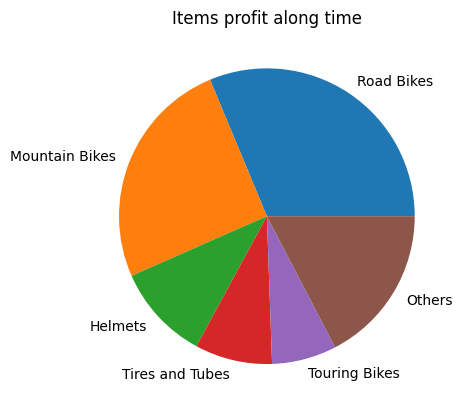

In [183]:
#Get the sub category sum profit and then sort it to highest to lowest
itemProfit = sales.groupby(['Sub_Category'])['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
itemProfit = pd.DataFrame(itemProfit)
#Get the 5 items with more profit
top5 = itemProfit.head(5)
#Combine the rest of items into one and add their profits
others = pd.DataFrame([['Others', itemProfit['Profit'][5:].sum()]], columns=['Sub_Category', 'Profit'])
#Combining the top 5 with the others
itemProfit = pd.concat([top5, others])
#Make the pie graph
itemProfit.plot(kind='pie',y='Profit',labels=itemProfit['Sub_Category'], legend=False, ylabel='', title='Items profit along time')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Some Customers Info

In [190]:
print('Mean customers age: ',round(sales['Customer_Age'].mean()))
print('Number of female customers: ',(sales['Customer_Gender'] == 'F').sum())
print('Number of male customers: ',(sales['Customer_Gender'] == 'M').sum())


Mean customers age:  36
Number of female customers:  54724
Number of male customers:  58312


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Country Sales Info

array([<Axes: >], dtype=object)

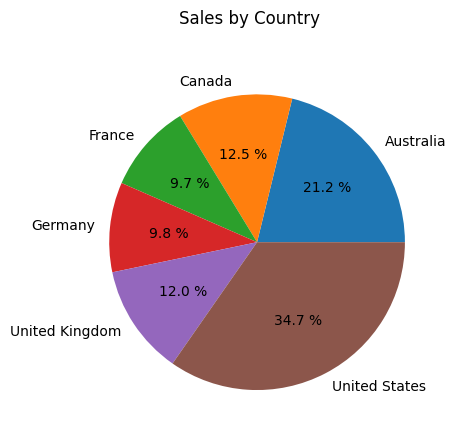

In [202]:
sales.groupby(['Country'])['Profit'].count().plot(kind='pie', subplots=True, autopct="%0.1f %%", ylabel='', title='Sales by Country')

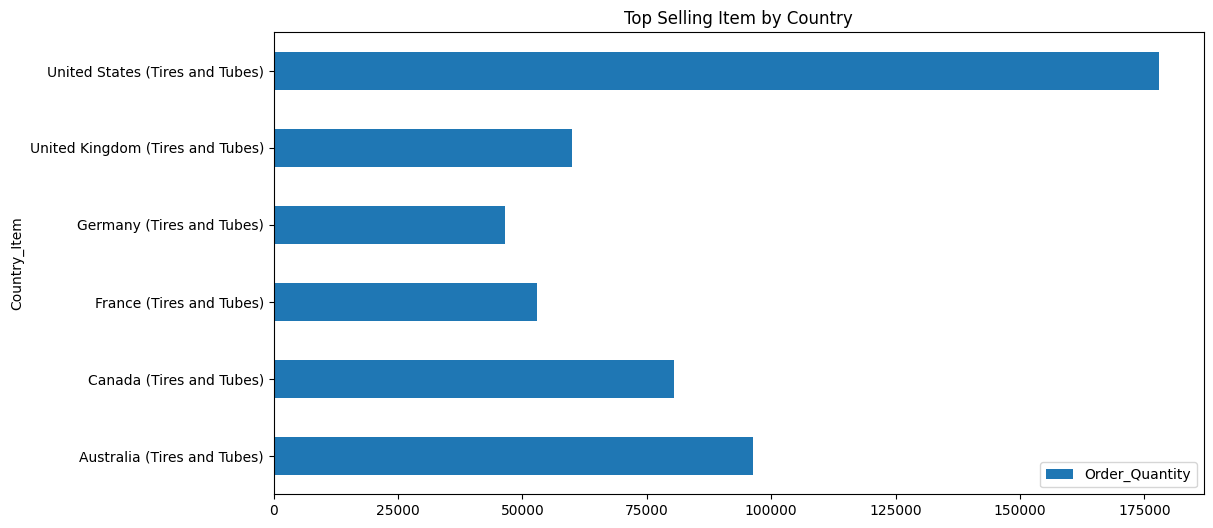

In [253]:
#Get the items number of sales by Country
countryItemSales = sales.groupby(['Country','Sub_Category'])['Order_Quantity'].sum().reset_index()
#Get the most item sale by Country
countryItemSales = countryItemSales.groupby(['Country']).apply(lambda x: x.nlargest(1, 'Order_Quantity')).reset_index(drop=True)
countryItemSales['Country_Item'] = countryItemSales['Country'] + ' (' + countryItemSales['Sub_Category'] + ')'
#Graph
countryItemSales.plot(kind='barh',x='Country_Item',y='Order_Quantity',title='Top Selling Item by Country',figsize=(12,6))
plt.show()